# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})
plt.rcParams['text.usetex'] = True

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}

Suppose a charged particle is moving at some fraction $f$ of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $K$. Reference frame $K^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $K^{\prime}$. To make the math easier, put $q$ at the origin of $K^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}


1. Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $K^{\prime}$. Choose an x-axis range that makes sense to you and <strong>label both axes with correct units.</strong>


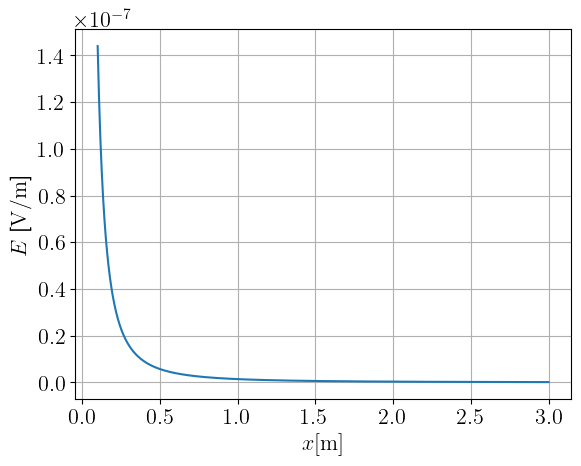

In [11]:
# Plot here
def E(q, r):
    return (1 / (4*np.pi*constants.epsilon_0)) * (q / (r**2))
arr_x = np.linspace(.1,3,1000)
arr_E = E(constants.elementary_charge, arr_x)
plt.plot(arr_x, arr_E)
plt.xlabel(r"$x [\rm m]$")
plt.ylabel(r"$E$ [$ \rm V / \rm m$]")
plt.grid(True)


2. The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $K^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.

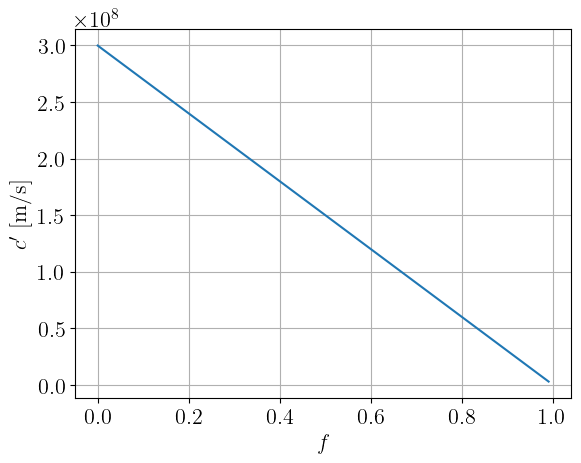

In [12]:
# Plot here
def c_prime(f):
    return constants.c - f * constants.c
arr_f = np.linspace(0,.99,1000)
plt.plot(arr_f, c_prime(arr_f))
plt.xlabel(r"$f$")
plt.ylabel(r"$c^{\prime} \ [\rm m / \rm s]$")
plt.grid(True)


3. In frame $K^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.

From part 2, $c' = c - fc$. Combining this with $c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}$ gives that $\epsilon_{0}^{\prime} = \frac{1}{\mu_0(c - fc)^2}$

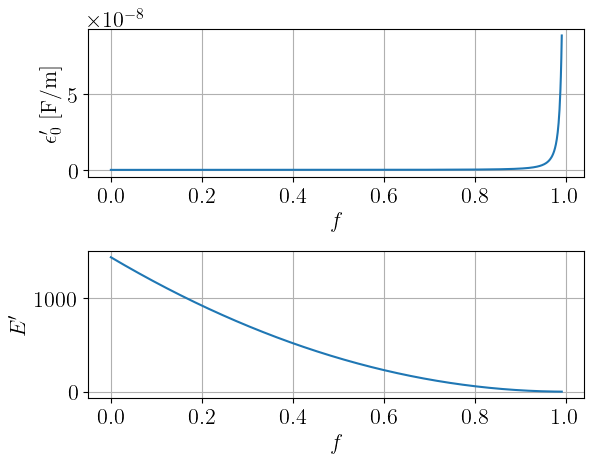

In [13]:
# Plot here
def epsilon_prime(f):
    return (1/ (constants.mu_0 * (constants.c - f * constants.c)**2))
def E_prime( e_0,r, q):
    return (1 / (4*np.pi *e_0)) * (q / (r**2))
arr_eps_prime = epsilon_prime(arr_f)
arr_E_prime = E_prime(arr_eps_prime, 10**-6,constants.elementary_charge)

fig, axes = plt.subplots(nrows = 2, ncols = 1)
axes[0].plot(arr_f, arr_eps_prime)
axes[1].plot(arr_f, arr_E_prime)
axes[0].set_ylabel(r"$\epsilon_{0}^{\prime} \ [\rm F / \rm m]$")
axes[1].set_ylabel(r"$E^\prime $")
axes[0].set_xlabel(r"$f$")
axes[1].set_xlabel(r"$f$")
axes[0].grid(True)
axes[1].grid(True)
plt.subplots_adjust(hspace=.5)



An issue occurs here, as the electric field in the co-moving reference frame goes to 0.


4. Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) and $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?

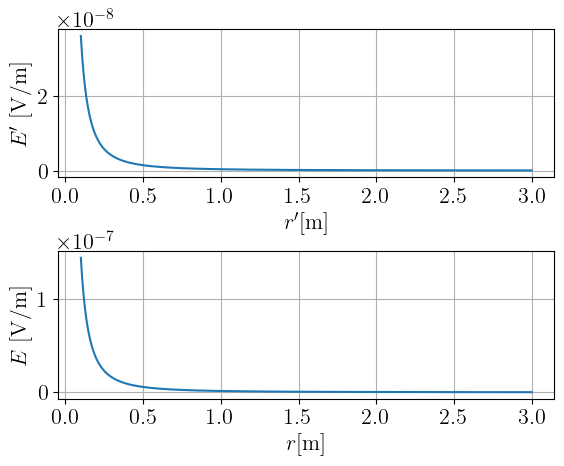

In [16]:
# Plot here
arr_E_prime_x = E_prime(epsilon_prime(.5), arr_x, constants.elementary_charge)
fig2, axes2 = plt.subplots(nrows = 2, ncols = 1)
axes2[0].plot(arr_x, arr_E_prime_x)
axes2[1].plot(arr_x, arr_E)
axes2[0].set_ylabel(r"$E^{\prime} \ [\rm V / \rm m]$")
axes2[1].set_ylabel(r"$E \ [\rm V / \rm m]$")
axes2[0].set_xlabel(r"$r^{\prime} [\rm m]$")
axes2[1].set_xlabel(r"$r [\rm m]$")
axes2[0].grid(True)
axes2[1].grid(True)
plt.subplots_adjust(hspace=.5)

The two reference frames do not agree on, on the value of the electric field.

5. To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $K^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $K$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.

Using the same logic as before, we get that $\mu_{0}^{\prime} = \frac{1}{\epsilon_0(c - fc)^2}$

Text(0.5, 0, '$f$')

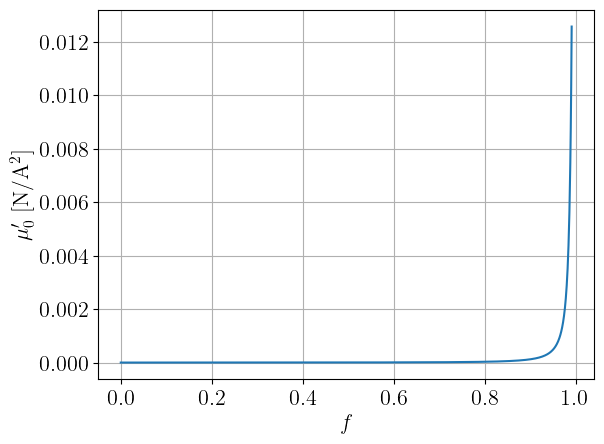

In [ ]:
# Plot here
def mu_prime(f):
    return (1/ (constants.epsilon_0 * (constants.c - f * constants.c)**2))
arr_mu_prime = mu_prime(arr_f)
plt.plot(arr_f, arr_mu_prime)
plt.ylabel(r"$\mu_{0}^{\prime} \ [\rm N / \rm A^2]$")
plt.grid(True)
plt.xlabel(r"$f$")

If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.

Two graphs comparing $E$ and $E'$ vs $f$ and $B$ and $B'$ vs $f$ for a given distance ($10^{-6} \rm m$)

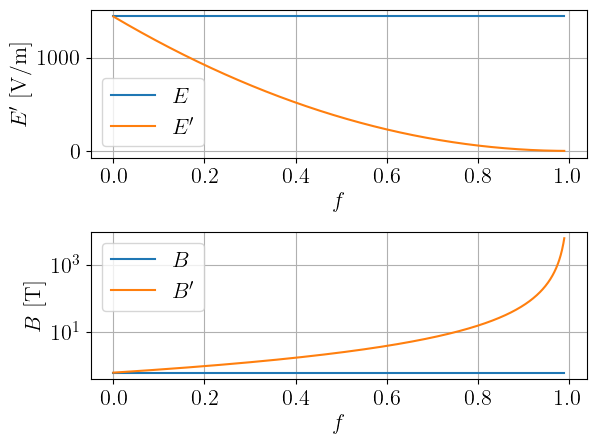

In [22]:
def B_prime(r, mu, I):
    return ((mu * I) / (2 * r))
arr_E_comp = np.ones_like(arr_f) * E(constants.elementary_charge, 10.**-6)
arr_B_prime = B_prime(10**-6, arr_mu_prime, 1.)
arr_B_comp = np.ones_like(arr_f) * B_prime(10.**-6,constants.mu_0, 1. )
fig3, axes3 = plt.subplots(nrows = 2, ncols = 1)
axes3[0].plot(arr_f, arr_E_comp)
axes3[0].plot(arr_f, arr_E_prime)
axes3[1].plot(arr_f, arr_B_comp)
axes3[1].plot(arr_f, arr_B_prime)
axes3[1].set_yscale("log")
axes3[0].legend([r"$E$", r"$E'$"], loc = 3)
axes3[1].legend([r"$B$", r"$B'$"], loc = 2)
axes3[0].set_ylabel(r"$E^{\prime} \ [\rm V / \rm m]$")
axes3[1].set_ylabel(r"$B \ [\rm T]$")
axes3[0].set_xlabel(r"$f$")
axes3[1].set_xlabel(r"$f$")
axes3[0].grid(True)
axes3[1].grid(True)
plt.subplots_adjust(hspace=.5)

$E' = E$ and $B' = B$ only when $f = 0$, essentially only when the two reference frames move at the same velocity.

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$ Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$ Newtons/Ampere $^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.